# AusPlots Soil Dataset Validation Copy

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
site_slga_data = pd.read_csv('../DATASETS/Soils_and_Landscape_Grid_of_Australia/Output/site_slga_data.csv', index_col = 0).copy()
site_slga_data.head()

,CLY_000_005,CLY_005_015,CLY_015_030,CLY_030_060,CLY_060_100,CLY_100_200,DER_000_999,NTO_000_005,NTO_005_015,NTO_015_030,...,SLT_000_005,SLT_005_015,SLT_030_060,SLT_060_100,SLT_100_200,pHc_000_005,pHc_005_015,pHc_015_030,pHc_030_060,pHc_060_100
NSABHC0015,16.750000,18.500000,22.500000,24.75,26.25,37.500000,49.353374,0.045113,0.041196,0.033463,...,12.50,13.000000,14.75,15.750000,11.000000,6.778077,6.810408,6.984777,7.166410,7.353638
NSABHC0018,14.666667,16.833334,19.166666,23.00,27.00,28.333334,36.075130,0.058668,0.053181,0.039478,...,12.00,12.333333,14.00,15.666667,10.833333,6.760462,6.850828,7.020003,7.166299,7.340396
NSABHC0019,16.250000,18.250000,20.000000,23.75,28.00,28.250000,48.759270,0.050166,0.045422,0.034784,...,12.50,12.750000,14.00,15.750000,11.000000,6.513579,6.596149,6.790872,7.059542,7.267633
NSABHC0020,15.000000,17.000000,22.500000,24.75,27.00,30.750000,30.916204,0.052847,0.047825,0.033557,...,10.00,11.000000,13.00,14.000000,10.000000,6.771367,6.856721,7.045397,7.198980,7.352275
NSABHC0021,17.750000,21.000000,26.500000,29.00,29.00,38.000000,37.567870,0.046372,0.042036,0.032747,...,12.75,13.250000,15.00,15.500000,11.000000,7.007833,7.095415,7.262317,7.415216,7.571328


In [3]:
soils_char = pd.read_csv('../DATASETS/AusPlots_Extracted_Data/extracted_soil_char_2-0-6.csv', index_col = 0).copy()
soils_char.head()

,soil.char.site_unique,soil.char.site_location_name,soil.char.site_location_visit_id,soil.char.upper_depth,soil.char.lower_depth,soil.char.horizon,soil.char.texture_grade,soil.char.texture_qualifier,soil.char.texture_modifier,soil.char.colour_when_moist,...,soil.char.ph,soil.char.pedality_grade,soil.char.pedality_fabric,soil.char.next_size_type_2,soil.char.next_size_type_1,soil.char.smallest_size_type_2,soil.char.smallest_size_type_1,soil.char.next_size_2,soil.char.next_size_1,soil.char.layer_barcode
1,NSABHC0013-53608,NSABHC0013,53608,0.50,0.60,NC,NC,NaN,NaN,NaN,...,NaN,NC,NC,NC,NC,NC,NC,NaN,11.0,NSA 050414
2,WAAPIL0030-58057,WAAPIL0030,58057,0.00,0.09,A1,MC,NC,NC,2.5YR2.54,...,6.8,M,R,NC,NC,NC,AB,NaN,NaN,WAA053908
3,WAAPIL0030-58057,WAAPIL0030,58057,0.09,0.45,B21K,MHC,NC,NC,2.5YR34,...,7.9,M,R,NC,NC,NC,AB,NaN,NaN,WAA053909
4,WAAPIL0030-58057,WAAPIL0030,58057,0.45,0.60,B22K,MC,NC,NC,10R34,...,8.6,NC,NC,NC,NC,NC,NC,NaN,NaN,WAA053910
5,NSABHC0013-53608,NSABHC0013,53608,0.30,0.40,NC,NC,NaN,NaN,NaN,...,NaN,NC,NC,NC,NC,NC,NC,NaN,11.0,NSA 050412


In [4]:
classifications = {
    'S': [0, 5],
    'LS': [5, 5],
    'CS': [5, 10],
    'SL': [10, 20],
    'L' : [25, 25],
    'ZL': [25, 25],
    'SCL' : [20, 30],
    'CL': [30, 35],
    'CLS' : [30, 35],
    'ZCL' : [30, 35],
    'LC' : [35, 40],
    'LMC' : [40, 45],
    'MC': [45, 55],
    'MHC': [50, 100],
    'HC': [50, 100],
    'NC': [-1, -1]
}
classifications = pd.DataFrame(classifications)

In [5]:
soils_char

,soil.char.site_unique,soil.char.site_location_name,soil.char.site_location_visit_id,soil.char.upper_depth,soil.char.lower_depth,soil.char.horizon,soil.char.texture_grade,soil.char.texture_qualifier,soil.char.texture_modifier,soil.char.colour_when_moist,...,soil.char.ph,soil.char.pedality_grade,soil.char.pedality_fabric,soil.char.next_size_type_2,soil.char.next_size_type_1,soil.char.smallest_size_type_2,soil.char.smallest_size_type_1,soil.char.next_size_2,soil.char.next_size_1,soil.char.layer_barcode
1,NSABHC0013-53608,NSABHC0013,53608,0.50,0.60,NC,NC,NaN,NaN,NaN,...,NaN,NC,NC,NC,NC,NC,NC,NaN,11.0,NSA 050414
2,WAAPIL0030-58057,WAAPIL0030,58057,0.00,0.09,A1,MC,NC,NC,2.5YR2.54,...,6.8,M,R,NC,NC,NC,AB,NaN,NaN,WAA053908
3,WAAPIL0030-58057,WAAPIL0030,58057,0.09,0.45,B21K,MHC,NC,NC,2.5YR34,...,7.9,M,R,NC,NC,NC,AB,NaN,NaN,WAA053909
4,WAAPIL0030-58057,WAAPIL0030,58057,0.45,0.60,B22K,MC,NC,NC,10R34,...,8.6,NC,NC,NC,NC,NC,NC,NaN,NaN,WAA053910
5,NSABHC0013-53608,NSABHC0013,53608,0.30,0.40,NC,NC,NaN,NaN,NaN,...,NaN,NC,NC,NC,NC,NC,NC,NaN,11.0,NSA 050412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,QDADEU0002-58962,QDADEU0002,58962,0.40,0.50,B1,SCL,NC,K,2.5YR48,...,NaN,W,NC,NC,NC,NC,SB,NaN,NaN,NaN
3722,QDADEU0002-58962,QDADEU0002,58962,0.50,0.60,B1,SCL,NC,K,2.5YR48,...,7.3,W,NC,NC,NC,NC,SB,NaN,NaN,QDA055986
3723,QDADEU0002-58962,QDADEU0002,58962,0.60,0.70,B1,SCL,NC,K,2.5YR48,...,NaN,W,NC,NC,NC,NC,SB,NaN,NaN,NaN
3724,QDADEU0002-58962,QDADEU0002,58962,0.70,0.85,B21,LC,NC,K,2.5YR58,...,7.2,W,NC,NC,NC,NC,SB,NaN,NaN,QDA055987


In [6]:
soils_char.loc[soils_char['soil.char.texture_grade'].isna(), 'soil.char.texture_grade'] = 'NC'

In [7]:
cly_min = [] 
cly_max = [] 
for i,v in soils_char.iterrows():
    texture_grade = v['soil.char.texture_grade']
    min_range = np.min(classifications.loc[0, texture_grade])
    max_range = np.max(classifications.loc[1, texture_grade])
    cly_min.append(min_range)
    cly_max.append(max_range)

In [8]:
soils_char['cly_min'] = cly_min
soils_char['cly_max'] = cly_max

In [9]:
soils_char['clay_mid'] = (soils_char['cly_min'] + soils_char['cly_max'])/2

In [10]:
soils_char.head()

,soil.char.site_unique,soil.char.site_location_name,soil.char.site_location_visit_id,soil.char.upper_depth,soil.char.lower_depth,soil.char.horizon,soil.char.texture_grade,soil.char.texture_qualifier,soil.char.texture_modifier,soil.char.colour_when_moist,...,soil.char.next_size_type_2,soil.char.next_size_type_1,soil.char.smallest_size_type_2,soil.char.smallest_size_type_1,soil.char.next_size_2,soil.char.next_size_1,soil.char.layer_barcode,cly_min,cly_max,clay_mid
1,NSABHC0013-53608,NSABHC0013,53608,0.50,0.60,NC,NC,NaN,NaN,NaN,...,NC,NC,NC,NC,NaN,11.0,NSA 050414,-1,-1,-1.0
2,WAAPIL0030-58057,WAAPIL0030,58057,0.00,0.09,A1,MC,NC,NC,2.5YR2.54,...,NC,NC,NC,AB,NaN,NaN,WAA053908,45,55,50.0
3,WAAPIL0030-58057,WAAPIL0030,58057,0.09,0.45,B21K,MHC,NC,NC,2.5YR34,...,NC,NC,NC,AB,NaN,NaN,WAA053909,50,100,75.0
4,WAAPIL0030-58057,WAAPIL0030,58057,0.45,0.60,B22K,MC,NC,NC,10R34,...,NC,NC,NC,NC,NaN,NaN,WAA053910,45,55,50.0
5,NSABHC0013-53608,NSABHC0013,53608,0.30,0.40,NC,NC,NaN,NaN,NaN,...,NC,NC,NC,NC,NaN,11.0,NSA 050412,-1,-1,-1.0


In [11]:
soils_char['depth_mid'] = (soils_char['soil.char.upper_depth'] + soils_char['soil.char.lower_depth'])/2 

In [12]:
soils_char.head()

,soil.char.site_unique,soil.char.site_location_name,soil.char.site_location_visit_id,soil.char.upper_depth,soil.char.lower_depth,soil.char.horizon,soil.char.texture_grade,soil.char.texture_qualifier,soil.char.texture_modifier,soil.char.colour_when_moist,...,soil.char.next_size_type_1,soil.char.smallest_size_type_2,soil.char.smallest_size_type_1,soil.char.next_size_2,soil.char.next_size_1,soil.char.layer_barcode,cly_min,cly_max,clay_mid,depth_mid
1,NSABHC0013-53608,NSABHC0013,53608,0.50,0.60,NC,NC,NaN,NaN,NaN,...,NC,NC,NC,NaN,11.0,NSA 050414,-1,-1,-1.0,0.550
2,WAAPIL0030-58057,WAAPIL0030,58057,0.00,0.09,A1,MC,NC,NC,2.5YR2.54,...,NC,NC,AB,NaN,NaN,WAA053908,45,55,50.0,0.045
3,WAAPIL0030-58057,WAAPIL0030,58057,0.09,0.45,B21K,MHC,NC,NC,2.5YR34,...,NC,NC,AB,NaN,NaN,WAA053909,50,100,75.0,0.270
4,WAAPIL0030-58057,WAAPIL0030,58057,0.45,0.60,B22K,MC,NC,NC,10R34,...,NC,NC,NC,NaN,NaN,WAA053910,45,55,50.0,0.525
5,NSABHC0013-53608,NSABHC0013,53608,0.30,0.40,NC,NC,NaN,NaN,NaN,...,NC,NC,NC,NaN,11.0,NSA 050412,-1,-1,-1.0,0.350


In [13]:
depth_intervals = []

for i in soils_char['depth_mid']:
    if i > 0.00 and i < 0.05:
        depth_intervals.append('CLY_000_005')
    elif i >= 0.05 and i < 0.15:
        depth_intervals.append('CLY_005_015')
    elif i >= 0.15 and i < 0.30:
        depth_intervals.append('CLY_015_030')
    elif i >= 0.30 and i < 0.60:
        depth_intervals.append('CLY_030_060')
    elif i >= 0.60 and i < 1.00:
        depth_intervals.append('CLY_060_100')
    elif i >= 1.00 and i < 2.00:
        depth_intervals.append('CLY_100_200')
    else:
        depth_intervals.append(-1)

In [14]:
soils_char['depth_interval'] = depth_intervals
soils_char['depth_length'] = abs(soils_char['soil.char.upper_depth'] - soils_char['soil.char.lower_depth'])

In [15]:
soils_char

,soil.char.site_unique,soil.char.site_location_name,soil.char.site_location_visit_id,soil.char.upper_depth,soil.char.lower_depth,soil.char.horizon,soil.char.texture_grade,soil.char.texture_qualifier,soil.char.texture_modifier,soil.char.colour_when_moist,...,soil.char.smallest_size_type_1,soil.char.next_size_2,soil.char.next_size_1,soil.char.layer_barcode,cly_min,cly_max,clay_mid,depth_mid,depth_interval,depth_length
1,NSABHC0013-53608,NSABHC0013,53608,0.50,0.60,NC,NC,NaN,NaN,NaN,...,NC,NaN,11.0,NSA 050414,-1,-1,-1.0,0.550,CLY_030_060,0.10
2,WAAPIL0030-58057,WAAPIL0030,58057,0.00,0.09,A1,MC,NC,NC,2.5YR2.54,...,AB,NaN,NaN,WAA053908,45,55,50.0,0.045,CLY_000_005,0.09
3,WAAPIL0030-58057,WAAPIL0030,58057,0.09,0.45,B21K,MHC,NC,NC,2.5YR34,...,AB,NaN,NaN,WAA053909,50,100,75.0,0.270,CLY_015_030,0.36
4,WAAPIL0030-58057,WAAPIL0030,58057,0.45,0.60,B22K,MC,NC,NC,10R34,...,NC,NaN,NaN,WAA053910,45,55,50.0,0.525,CLY_030_060,0.15
5,NSABHC0013-53608,NSABHC0013,53608,0.30,0.40,NC,NC,NaN,NaN,NaN,...,NC,NaN,11.0,NSA 050412,-1,-1,-1.0,0.350,CLY_030_060,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,QDADEU0002-58962,QDADEU0002,58962,0.40,0.50,B1,SCL,NC,K,2.5YR48,...,SB,NaN,NaN,NaN,20,30,25.0,0.450,CLY_030_060,0.10
3722,QDADEU0002-58962,QDADEU0002,58962,0.50,0.60,B1,SCL,NC,K,2.5YR48,...,SB,NaN,NaN,QDA055986,20,30,25.0,0.550,CLY_030_060,0.10
3723,QDADEU0002-58962,QDADEU0002,58962,0.60,0.70,B1,SCL,NC,K,2.5YR48,...,SB,NaN,NaN,NaN,20,30,25.0,0.650,CLY_060_100,0.10
3724,QDADEU0002-58962,QDADEU0002,58962,0.70,0.85,B21,LC,NC,K,2.5YR58,...,SB,NaN,NaN,QDA055987,35,40,37.5,0.775,CLY_060_100,0.15


In [16]:
soils_char_essential = soils_char[['soil.char.site_location_name', 'soil.char.upper_depth','soil.char.lower_depth','depth_mid','clay_mid', 'depth_interval', 'depth_length', 'soil.char.texture_grade']]
soils_char_essential.head()

,soil.char.site_location_name,soil.char.upper_depth,soil.char.lower_depth,depth_mid,clay_mid,depth_interval,depth_length,soil.char.texture_grade
1,NSABHC0013,0.50,0.60,0.550,-1.0,CLY_030_060,0.10,NC
2,WAAPIL0030,0.00,0.09,0.045,50.0,CLY_000_005,0.09,MC
3,WAAPIL0030,0.09,0.45,0.270,75.0,CLY_015_030,0.36,MHC
4,WAAPIL0030,0.45,0.60,0.525,50.0,CLY_030_060,0.15,MC
5,NSABHC0013,0.30,0.40,0.350,-1.0,CLY_030_060,0.10,NC


In [17]:
soils_char_essential = soils_char_essential[ (soils_char_essential['clay_mid'] != -1.0) & (soils_char_essential['depth_interval'] != -1)]
soils_char_essential.head()

,soil.char.site_location_name,soil.char.upper_depth,soil.char.lower_depth,depth_mid,clay_mid,depth_interval,depth_length,soil.char.texture_grade
2,WAAPIL0030,0.00,0.09,0.045,50.0,CLY_000_005,0.09,MC
3,WAAPIL0030,0.09,0.45,0.270,75.0,CLY_015_030,0.36,MHC
4,WAAPIL0030,0.45,0.60,0.525,50.0,CLY_030_060,0.15,MC
9,WAAPIL0031,0.00,0.17,0.085,15.0,CLY_005_015,0.17,SL
10,WAAPIL0032,0.08,0.16,0.120,25.0,CLY_005_015,0.08,SCL


In [18]:
slga_clay = []
for i, v in soils_char_essential.iterrows():
    #print(v['depth_interval'])
    clay_value = site_slga_data.loc[site_slga_data.index == v['soil.char.site_location_name'], v['depth_interval']].values[0]
    slga_clay.append(clay_value)

In [19]:
soils_char_essential['slga_clay'] = slga_clay

In [20]:
soils_char_essential = soils_char_essential[soils_char_essential['slga_clay'].isna() == False]

In [21]:
soils_char_essential.head()

,soil.char.site_location_name,soil.char.upper_depth,soil.char.lower_depth,depth_mid,clay_mid,depth_interval,depth_length,soil.char.texture_grade,slga_clay
2,WAAPIL0030,0.00,0.09,0.045,50.0,CLY_000_005,0.09,MC,21.00
3,WAAPIL0030,0.09,0.45,0.270,75.0,CLY_015_030,0.36,MHC,27.75
4,WAAPIL0030,0.45,0.60,0.525,50.0,CLY_030_060,0.15,MC,28.50
9,WAAPIL0031,0.00,0.17,0.085,15.0,CLY_005_015,0.17,SL,16.50
10,WAAPIL0032,0.08,0.16,0.120,25.0,CLY_005_015,0.08,SCL,22.75


In [22]:
def plot_boxplot(grade_value, classifications, dataset):
    
    dataset = dataset[dataset['soil.char.texture_grade'] == grade_value]
    
    if len(dataset) > 0:
    
        dataset.boxplot(column = ['slga_clay'], by = ['depth_interval'], figsize = (10,5))
        plt.axhline(y = classifications[grade_value][0], color = 'red', linestyle = 'dashed')
        plt.axhline(y = (classifications[grade_value][0] + classifications[grade_value][1])/2, color = 'black', linestyle = 'dashed')
        plt.axhline(y = classifications[grade_value][1], color = 'red', linestyle = 'dashed')
        plt.suptitle(grade_value) 
        plt.ylim(0, 100)
        plt.show()

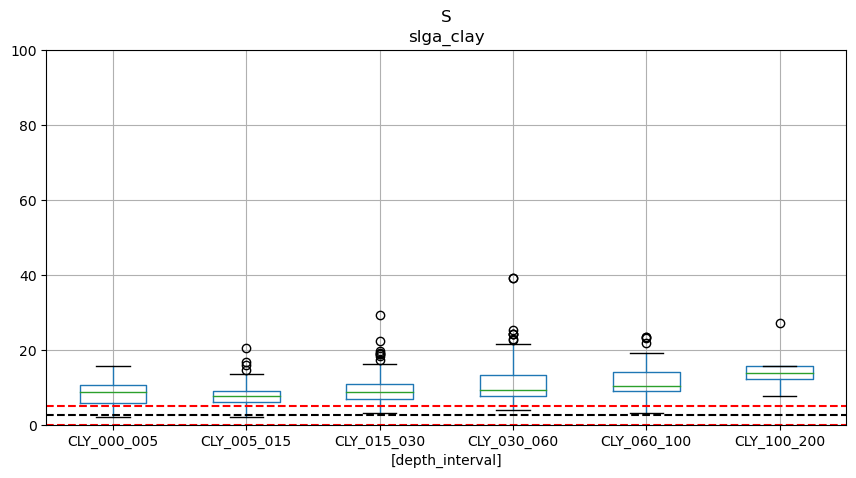

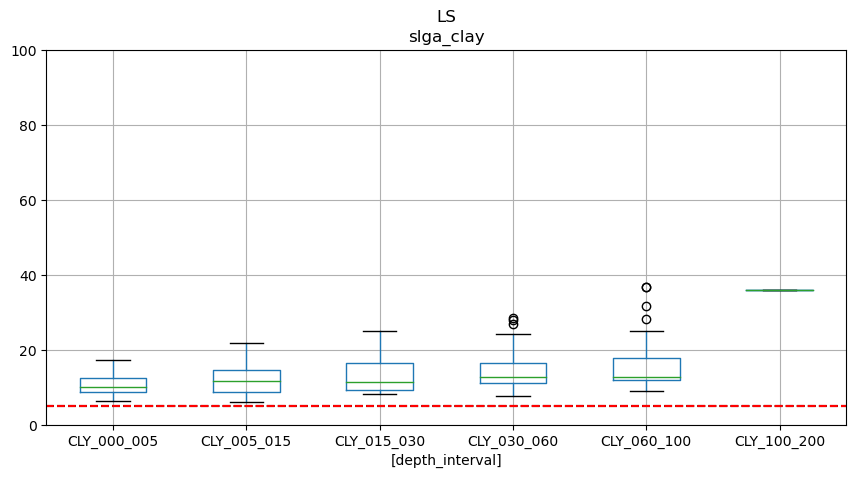

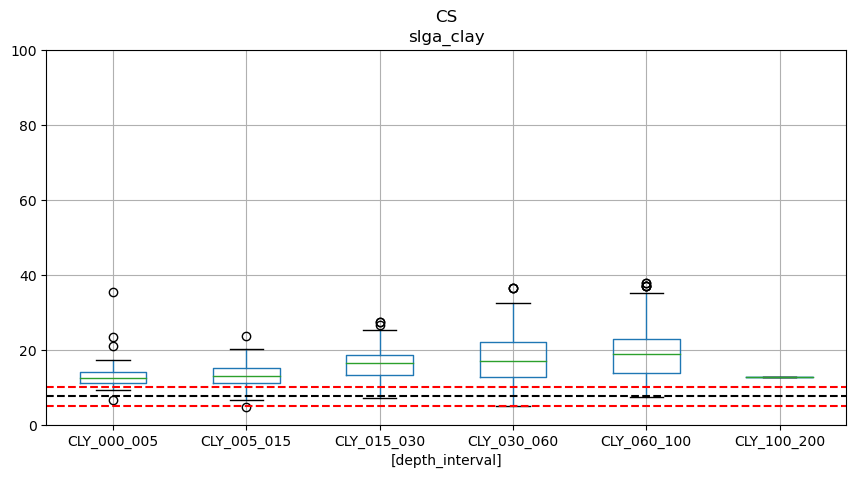

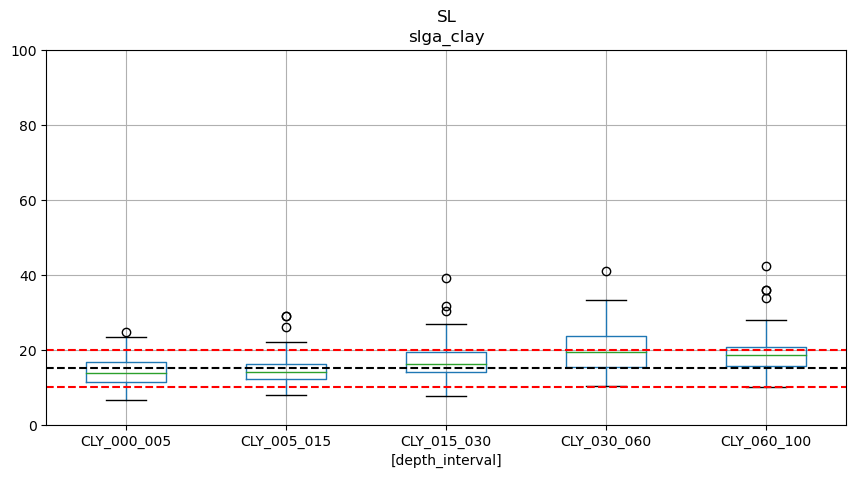

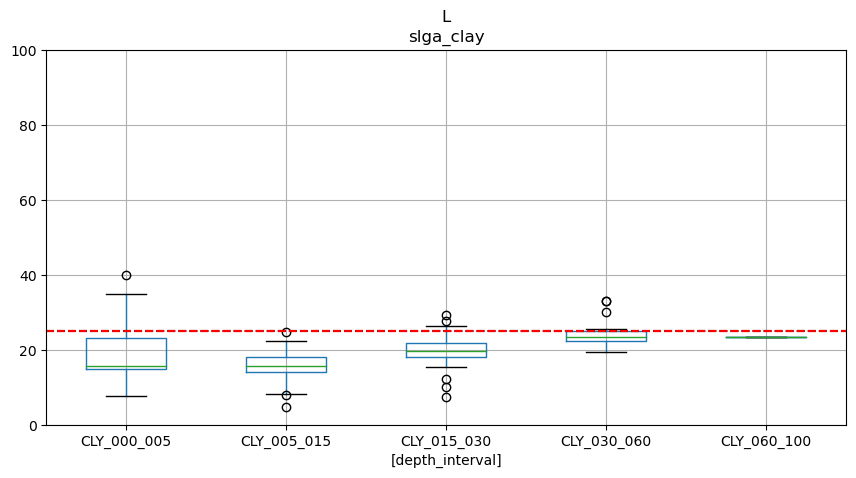

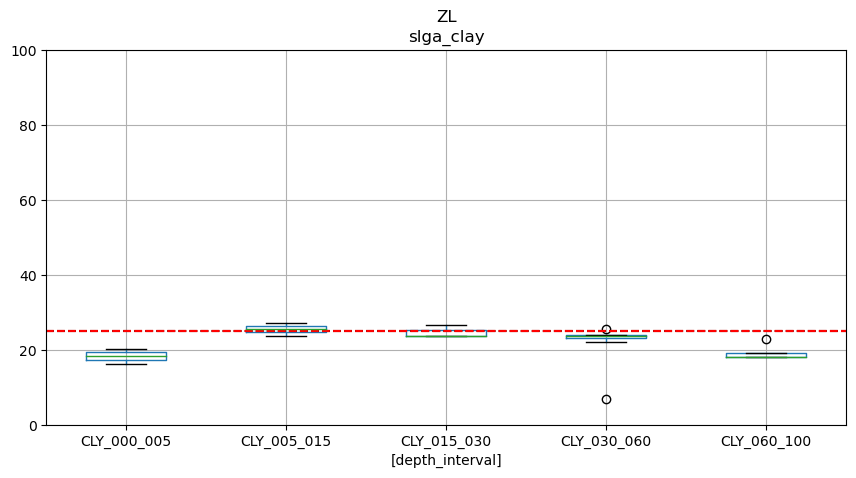

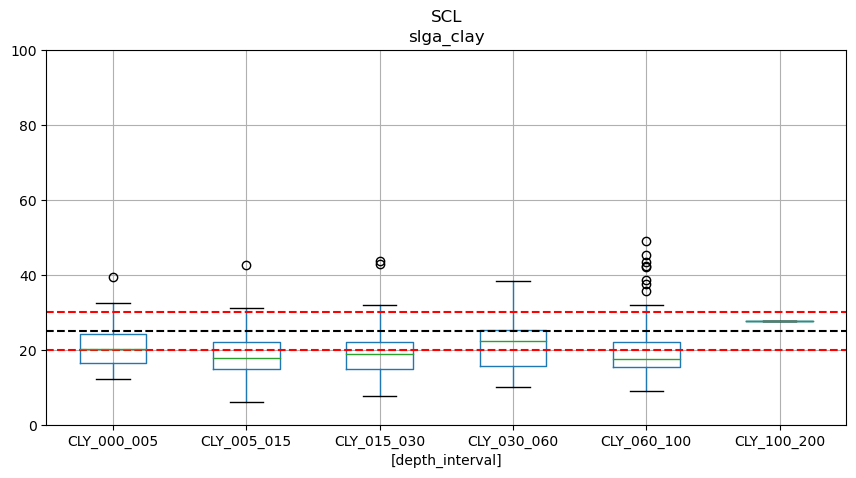

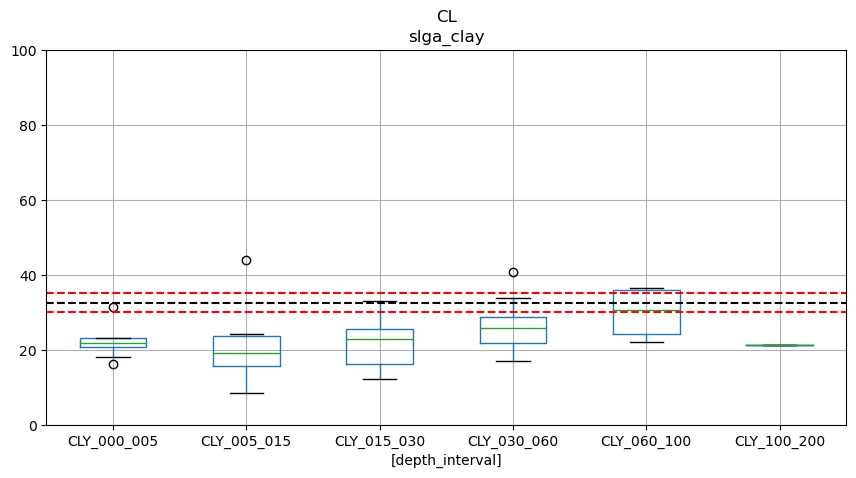

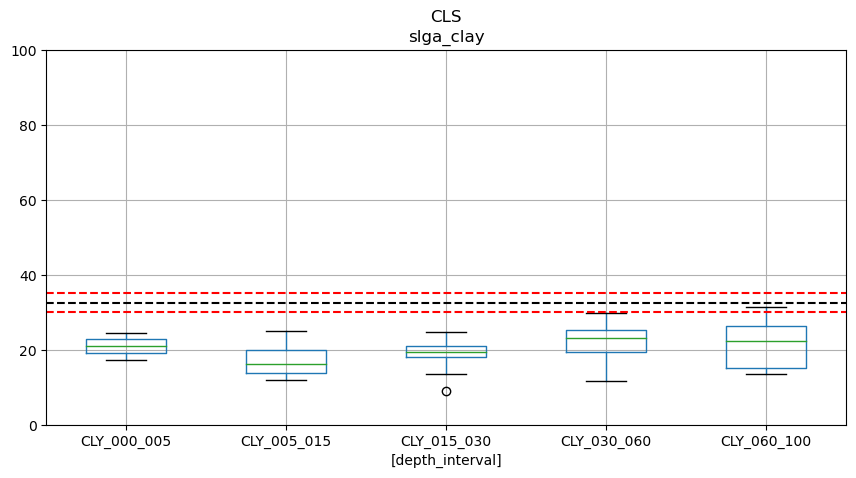

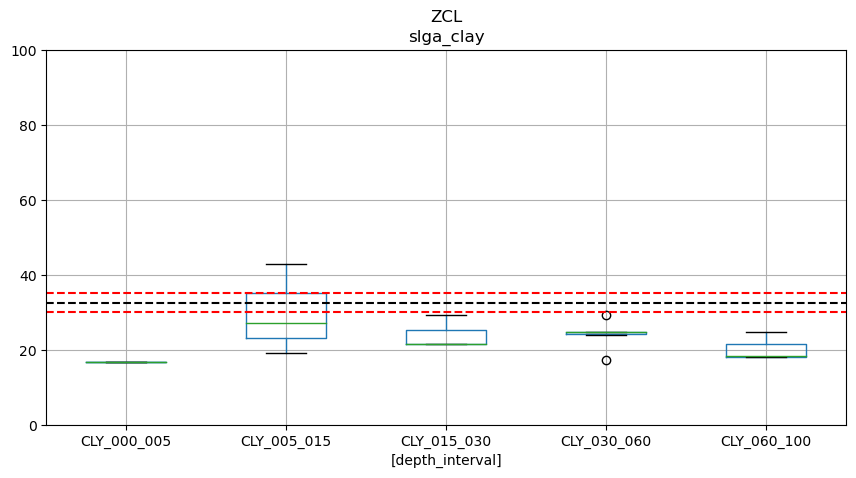

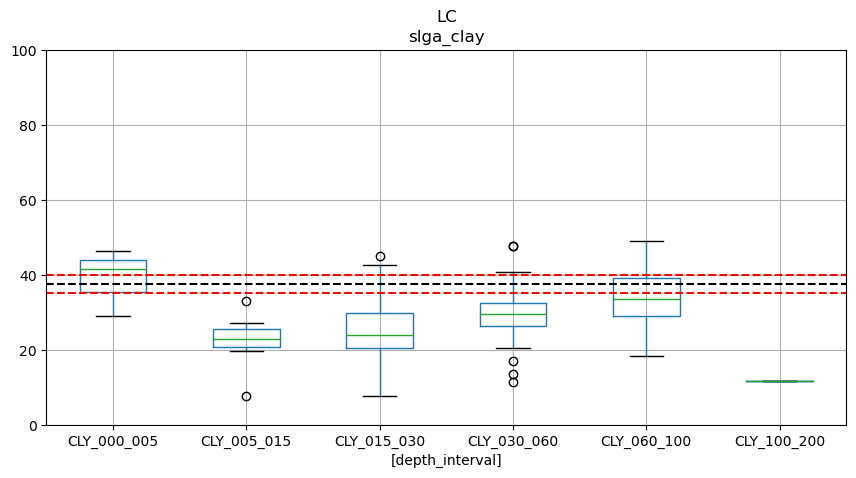

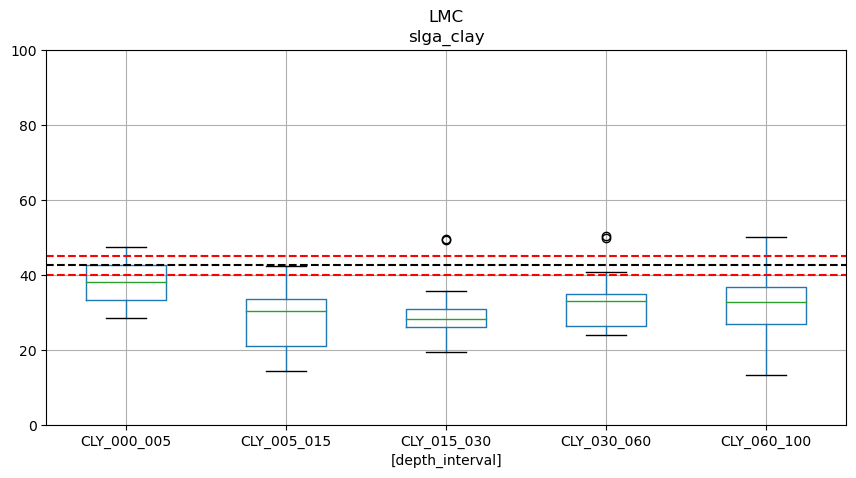

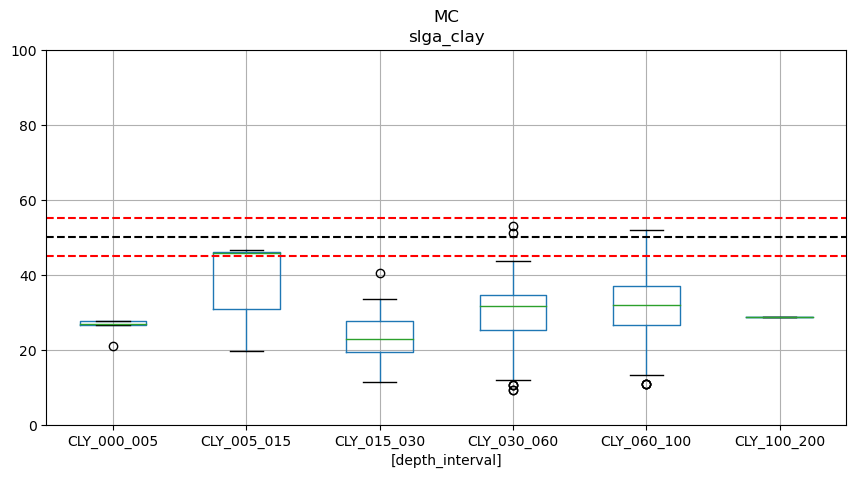

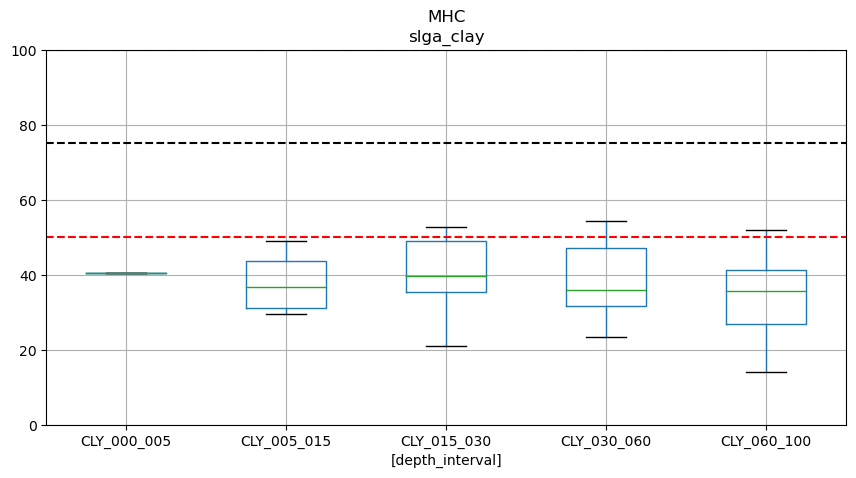

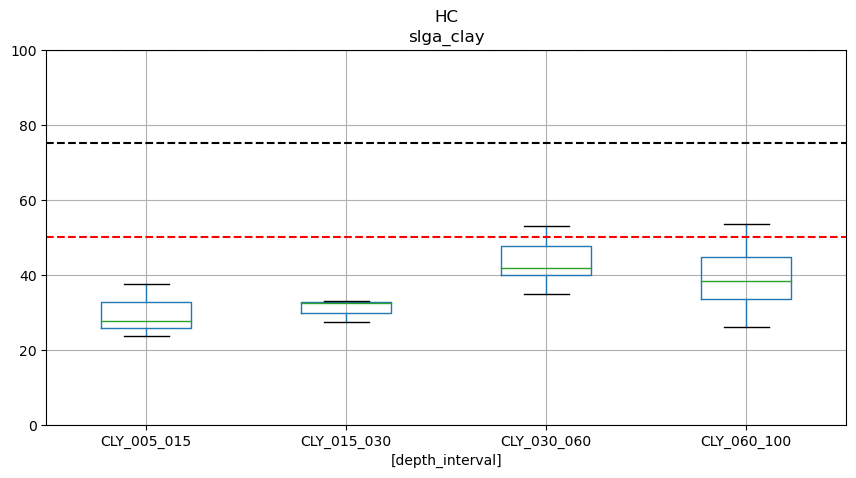

In [23]:
for i in classifications.keys():
    if i != 'NC':
        plot_boxplot(i, classifications, soils_char_essential)

In [24]:
soils_char_essential['error'] = np.abs(soils_char_essential['slga_clay'] - soils_char_essential['clay_mid'])

In [25]:
soils_char_essential['State'] = [i[:2] for i in soils_char_essential['soil.char.site_location_name'].values]

In [26]:
soils_char_essential[['State','error']].groupby('State').describe()

error                                                            \
       count       mean        std  min       25%       50%        75%   
State                                                                    
NS     233.0   8.567728   5.940498  0.0  4.333333  7.800000  11.250000   
NT     503.0   7.349155   5.465611  0.0  3.750000  6.500000   9.583333   
QD     440.0  13.026831  11.008685  0.0  5.187500  8.750000  17.250000   
SA     693.0  10.123208  10.059804  0.0  4.000000  7.250000  12.000000   
TC     113.0  12.306539   9.543566  0.0  5.500000  9.333334  16.500000   
VC      42.0  10.503968   5.905046  3.0  7.000000  9.500000  12.187500   
WA     589.0   8.231371   7.720218  0.0  3.750000  6.500000  10.500000   

                  
             max  
State             
NS     43.250000  
NT     49.000000  
QD     51.500000  
SA     61.000000  
TC     40.166668  
VC     38.750000  
WA     58.000000

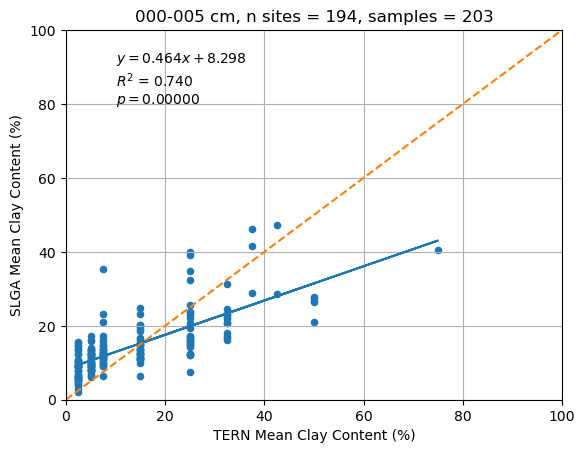

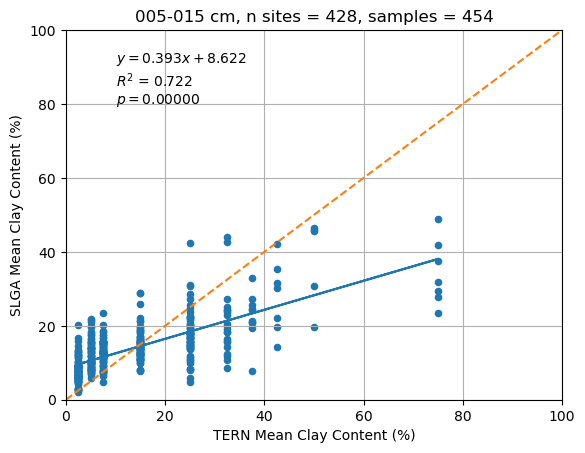

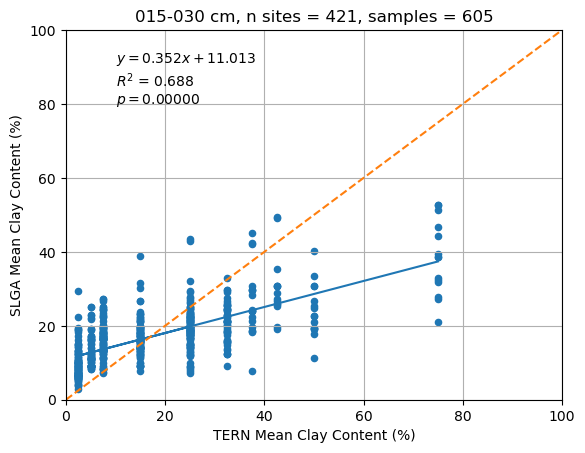

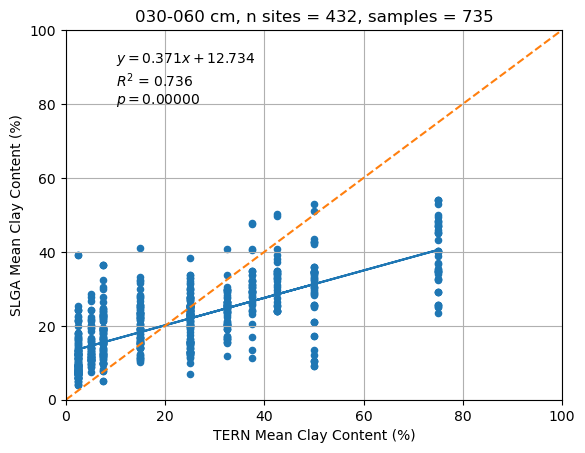

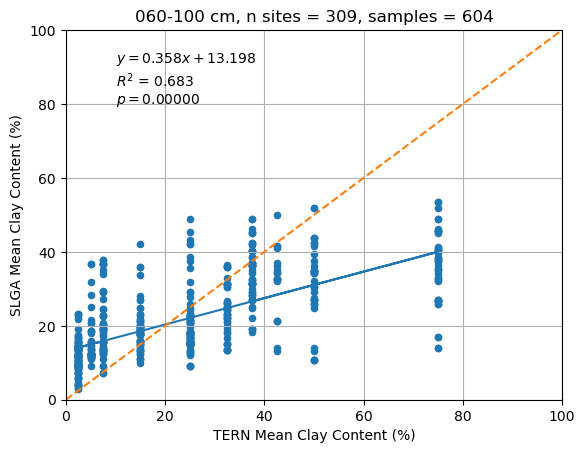

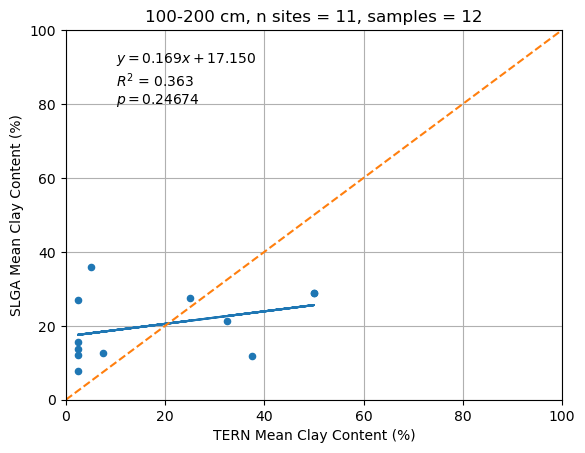

In [27]:

for i in np.unique(soils_char_essential['depth_interval']):
    subset = soils_char_essential[soils_char_essential['depth_interval'] == i]
    interval = subset.depth_interval[subset.index[0]].split('_')
    interval_upper_lower = interval[1:]
    lo = '-'.join(interval_upper_lower) + ' cm'
    n_sites = len(np.unique(subset['soil.char.site_location_name']))
    n_rows = len(subset)
    subset.plot.scatter(x = 'clay_mid', y = 'slga_clay', title = f'{lo}, n sites = {n_sites}, samples = {n_rows}',
                        ylim = (0,100), xlim = (0,100), 
                        xlabel = "TERN Mean Clay Content (%)", ylabel = "SLGA Mean Clay Content (%)")
    slope, intercept, r, p, se = stats.linregress(x = subset['clay_mid'], y = subset['slga_clay'])
    plt.plot(subset['clay_mid'],intercept + slope*subset['clay_mid'], label='fitted line')
    one_to_one = [i for i in range(101)]
    plt.plot(one_to_one, one_to_one, linestyle = 'dashed')
    plt.annotate(f'$y = {slope:.3f}x + {intercept:.3f}$\n$R^2$ = {r:.3f}\n$p = {p:.5f}$', xy = (10, 80))
    plt.grid(True)

In [28]:
len(np.unique(soils_char_essential['soil.char.site_location_name']))

587